# jascharan 

## 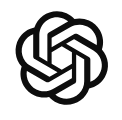

## Proposition 

List all customers along with the total number of orders they have placed, including customers with no orders.

### Functional Specification

1. **Input**:
    
    - `Customers` table containing customer information (`CustomerID`, `CustomerName`).
    - `Orders` table containing order information (`OrderID`, `CustomerID`).
2. **Process**:
    
    - Perform a left join on the `Customers` table and the `Orders` table using the `CustomerID` as the key.
    - Count the total number of orders for each customer.
    - Include customers with no orders in the result set, displaying a count of zero.
3. **Output**:
    
    - A list of all customers, including:
        - `CustomerID`
        - `CustomerName`
        - `TotalOrders` (count of orders for each customer)

In [ ]:
--Proposition 1: Find all customers and their total number of orders.
use NewWideWorldImporters;
go
SELECT C.CustomerID, C.CustomerName, COUNT(O.OrderID) AS TotalOrders
FROM Sales.Customers AS C
LEFT JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
GROUP BY C.CustomerID, C.CustomerName;


## Proposition

List all invoices along with their total amount by summing up the quantity and unit price of each line item in the invoice.

### Objective: Retrieve invoice IDs, invoice dates, and the total amount for each invoice.

### Tables Involved: \`Invoices\`, \`InvoiceLines\`

###  Conditions: Group the results by \`InvoiceID\` and \`InvoiceDate\`.

## Functional Specification

### Query Name: List Invoice Totals

### Description
This query retrieves a summary of each invoice, including its ID, date, and total amount. The total amount for each invoice is calculated by multiplying the quantity of each line item by its unit price and summing these values for each invoice.

### Inputs
- `Sales.Invoices`: Contains invoice data, including `InvoiceID` and `InvoiceDate`.
- `Sales.InvoiceLines`: Contains line items for invoices, including `InvoiceID`, `Quantity`, and `UnitPrice`.

### Outputs
- `InvoiceID`: The unique identifier of the invoice.
- `InvoiceDate`: The date the invoice was created.
- `TotalAmount`: The total amount of the invoice, calculated as the sum of (Quantity * UnitPrice) for each line item.

### Steps
1. Select `InvoiceID` and `InvoiceDate` from the `Invoices` table.
2. Join the `Invoices` table with the `InvoiceLines` table on `InvoiceID`.
3. Calculate the total amount for each invoice by summing the product of `Quantity` and `UnitPrice`.
4. Group the results by `InvoiceID` and `InvoiceDate`.

### Assumptions
- Each invoice contains at least one line item.
- The `Quantity` and `UnitPrice` in `InvoiceLines` are valid numeric values.

### Example Output
| InvoiceID | InvoiceDate | TotalAmount |
|-----------|-------------|-------------|
| 1001      | 2024-09-01  | 500.00      |
| 1002      | 2024-09-05  | 1200.00     |


In [ ]:
SELECT I.InvoiceID, I.InvoiceDate, SUM(IL.Quantity * IL.UnitPrice) AS TotalAmount
FROM Sales.Invoices AS I
INNER JOIN Sales.InvoiceLines AS IL ON I.InvoiceID = IL.InvoiceID
GROUP BY I.InvoiceID, I.InvoiceDate;

### Proposition
Find all products (stock items) that have been sold along with their total quantities sold.

### Functional Specification

**Query Name:** `TotalQuantitySoldPerStockItem`

**Description:** This query retrieves each stock item from the warehouse and calculates the total quantity sold for each item by joining the `StockItems` and `OrderLines` tables. It then groups the data by `StockItemID` and `StockItemName`.

**Inputs:**
- `Warehouse.StockItems`: Table containing details of stock items.
- `Sales.OrderLines`: Table containing details of order lines including quantities sold.

**Outputs:**
- `StockItemID`: The unique identifier for each stock item.
- `StockItemName`: The name of the stock item.
- `TotalQuantitySold`: The total quantity of each stock item sold.

**Steps:**
1. Select `StockItemID` and `StockItemName` from the `StockItems` table.
2. Join the `StockItems` table with the `OrderLines` table on `StockItemID`.
3. Calculate the total quantity sold for each stock item using the `SUM` function on the `Quantity` column from the `OrderLines` table.
4. Group the results by `StockItemID` and `StockItemName` to get a total for each stock item.

**Assumptions:**
- Each stock item in the `OrderLines` table is a valid item listed in the `StockItems` table.
- Quantity values in `OrderLines` are non-negative integers representing the number of units sold.

**Example Output:**
| StockItemID | StockItemName | TotalQuantitySold |
|-------------|---------------|-------------------|
| 1           | Item A        | 150               |
| 2           | Item B        | 300               |

In [ ]:
SELECT SI.StockItemID, SI.StockItemName, SUM(OL.Quantity) AS TotalQuantitySold
FROM Warehouse.StockItems AS SI
INNER JOIN Sales.OrderLines AS OL ON SI.StockItemID = OL.StockItemID
GROUP BY SI.StockItemID, SI.StockItemName;

## Proposition
Retrieve the total amount spent by each customer.

## Functional Specification

### Query Name
TotalSpentByCustomer

### Description
This query calculates the total amount spent by each customer by summing the product of quantity and unit price for each order line. It groups the data by customer and returns the results in descending order of total spent.

### Inputs
- **Customers**: Contains customer information (`CustomerID`, `CustomerName`).
- **Orders**: Contains order information (`OrderID`, `CustomerID`).
- **OrderLines**: Contains order line details (`OrderID`, `Quantity`, `UnitPrice`).

### Outputs
- **CustomerID**: Unique identifier for the customer.
- **CustomerName**: Name of the customer.
- **TotalSpent**: Total amount the customer has spent, calculated as the sum of quantity multiplied by unit price for all of their orders.

### Steps
1. Select `CustomerID` and `CustomerName` from the `Customers` table.
2. Join the `Orders` table with `Customers` using `CustomerID`.
3. Join the `OrderLines` table with `Orders` using `OrderID`.
4. Calculate the total amount spent by multiplying `Quantity` with `UnitPrice` for each order line.
5. Group the results by `CustomerID` and `CustomerName`.
6. Order the results by `TotalSpent` in descending order.

### Assumptions
- Every customer has at least one order.
- Each order has at least one associated order line.
- There are no negative values for quantity or unit price.

### Example Output
| CustomerID | CustomerName | TotalSpent |
|------------|--------------|------------|
| 101        | John Doe     | 1500.00    |
| 202        | Jane Smith   | 1200.50    |
| 303        | Alice Brown  | 900.75     |

In [ ]:
SELECT C.CustomerID, C.CustomerName, SUM(OL.Quantity * OL.UnitPrice) AS TotalSpent
FROM Sales.Customers AS C
INNER JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
INNER JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
GROUP BY C.CustomerID, C.CustomerName
ORDER BY TotalSpent DESC;

## Proposition
List all customer transactions along with their transaction amount and date.

## Functional Specification

### Query Name
List_Customer_Transactions

### Description
This query retrieves all customer transactions, including the transaction ID, customer name, transaction amount, and transaction date, from the `Sales.CustomerTransactions` and `Sales.Customers` tables.

### Inputs
- `Sales.CustomerTransactions` table
- `Sales.Customers` table

### Outputs
- `CustomerTransactionID` - The unique identifier for each customer transaction.
- `CustomerName` - The name of the customer associated with the transaction.
- `TransactionAmount` - The amount for the specific transaction.
- `TransactionDate` - The date when the transaction took place.

### Steps
1. Perform an inner join between the `Sales.CustomerTransactions` (`CT`) table and the `Sales.Customers` (`C`) table using the `CustomerID` as the common key.
2. Select the following columns:
   - `CT.CustomerTransactionID`
   - `C.CustomerName`
   - `CT.TransactionAmount`
   - `CT.TransactionDate`

### Assumptions
- Each transaction in the `Sales.CustomerTransactions` table is linked to a valid customer in the `Sales.Customers` table.
- `CustomerID` uniquely identifies each customer in the `Sales.Customers` table.

### Example Output
| CustomerTransactionID | CustomerName | TransactionAmount | TransactionDate |
|-----------------------|--------------|-------------------|-----------------|
| 101                   | John Doe     | 500.00            | 2024-09-30      |
| 102                   | Jane Smith   | 250.00            | 2024-09-29      |

In [ ]:
SELECT CT.CustomerTransactionID, C.CustomerName, CT.TransactionAmount, CT.TransactionDate
FROM Sales.CustomerTransactions AS CT
INNER JOIN Sales.Customers AS C ON CT.CustomerID = C.CustomerID;


## Proposition
Find the top-selling product (stock item) by total quantity sold.

## Functional Specification

### Query Name
Top_Selling_Product

### Description
This query retrieves the stock item with the highest total quantity sold.

### Inputs
- **Warehouse.StockItems**: The table containing details of all stock items.
- **Sales.OrderLines**: The table containing order details, including quantities of stock items sold.

### Outputs
- **StockItemID**: The ID of the top-selling stock item.
- **StockItemName**: The name of the top-selling stock item.
- **TotalQuantitySold**: The total quantity sold for this stock item.

### Steps
1. Select the `StockItemID` and `StockItemName` from the `Warehouse.StockItems` table.
2. Join the `Sales.OrderLines` table on the `StockItemID` to link stock items with their sales data.
3. Group the results by `StockItemID` and `StockItemName`.
4. Calculate the sum of the quantities sold (`TotalQuantitySold`) for each stock item.
5. Order the results by `TotalQuantitySold` in descending order.
6. Select the top result to get the stock item with the highest total quantity sold.

### Assumptions
- The query assumes there is at least one record in the `OrderLines` table for a stock item.
- If there are ties for the top quantity, only one will be selected arbitrarily due to `TOP 1`.

### Example Output
| StockItemID | StockItemName      | TotalQuantitySold |
|-------------|--------------------|-------------------|
| 1           | Blue T-shirt       | 500               |


In [ ]:
SELECT TOP 1 SI.StockItemID, SI.StockItemName, SUM(OL.Quantity) AS TotalQuantitySold
FROM Warehouse.StockItems AS SI
INNER JOIN Sales.OrderLines AS OL ON SI.StockItemID = OL.StockItemID
GROUP BY SI.StockItemID, SI.StockItemName
ORDER BY TotalQuantitySold DESC;


## Proposition
Find the top 5 customers with the highest number of orders.

## Functional Specification

### Query Name
Top 5 Customers by Total Orders

### Description
This query retrieves the top 5 customers based on the total number of orders they have placed. It displays the customer ID, customer name, and the total number of orders for each of the top customers in descending order.

### Inputs
- None

### Outputs
- **CustomerID**: Unique identifier for each customer.
- **CustomerName**: Name of the customer.
- **TotalOrders**: Total count of orders placed by the customer.

### Steps
1. Select the `CustomerID` and `CustomerName` from the `Sales.Customers` table.
2. Join the `Sales.Customers` table with the `Sales.Orders` table using `CustomerID`.
3. Group the results by `CustomerID` and `CustomerName`.
4. Calculate the total number of orders for each customer using `COUNT`.
5. Sort the results in descending order based on the total number of orders.
6. Limit the results to the top 5 customers.

### Assumptions
- Every customer in the `Sales.Orders` table is present in the `Sales.Customers` table.
- Each order has a valid `CustomerID` associated with it.

### Example Output
| CustomerID | CustomerName       | TotalOrders |
|------------|--------------------|-------------|
| 123        | John Doe           | 15          |
| 456        | Jane Smith         | 12          |
| 789        | Robert Johnson     | 10          |
| 101        | Emily Davis        | 8           |
| 112        | Michael Brown      | 7           |

In [ ]:
SELECT TOP 5 C.CustomerID, C.CustomerName, COUNT(O.OrderID) AS TotalOrders
FROM Sales.Customers AS C
INNER JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
GROUP BY C.CustomerID, C.CustomerName
ORDER BY TotalOrders DESC;


## Proposition
Calculate the average unit price for each stock group.

## Functional Specification

### Query Name
Average Unit Price per Stock Group

### Description
This query retrieves the average unit price for each stock group in the warehouse. It joins three tables (`StockGroups`, `StockItemStockGroups`, and `StockItems`) to calculate the average unit price for items within each group.

### Inputs
- None

### Outputs
- `StockGroupID`: Unique identifier for each stock group.
- `StockGroupName`: Name of the stock group.
- `AverageUnitPrice`: The average unit price of items within each stock group.

### Steps
1. Select the `StockGroupID` and `StockGroupName` from the `Warehouse.StockGroups` table.
2. Join the `Warehouse.StockItemStockGroups` table on the `StockGroupID`.
3. Join the `Warehouse.StockItems` table on the `StockItemID` to retrieve the unit prices.
4. Group the results by `StockGroupID` and `StockGroupName`.
5. Calculate the average unit price for each stock group using the `AVG()` function.

### Assumptions
- All stock items have a unit price.
- Each stock item belongs to at least one stock group.

### Example Output
| StockGroupID | StockGroupName | AverageUnitPrice |
|--------------|----------------|------------------|
| 1            | Electronics    | 199.99           |
| 2            | Furniture      | 499.50           |
| 3            | Clothing       | 29.99            |

In [ ]:
SELECT SG.StockGroupID, SG.StockGroupName, AVG(SI.UnitPrice) AS AverageUnitPrice
FROM Warehouse.StockGroups AS SG
INNER JOIN Warehouse.StockItemStockGroups AS SISG ON SG.StockGroupID = SISG.StockGroupID
INNER JOIN Warehouse.StockItems AS SI ON SISG.StockItemID = SI.StockItemID
GROUP BY SG.StockGroupID, SG.StockGroupName;


## Proposition
Find all customers along with their total number of transactions.

## Functional Specification

### Query Name
**Customer_Transaction_Count**

### Description
This query retrieves each customer's ID and name, along with the total count of their transactions. It joins the `Customers` and `CustomerTransactions` tables to get the relevant transaction count for each customer.

### Inputs
- **Customers Table**: Contains customer information such as `CustomerID` and `CustomerName`.
- **CustomerTransactions Table**: Contains transaction details linked to each customer by `CustomerID`.

### Outputs
- **CustomerID**: Unique identifier for each customer.
- **CustomerName**: Name of the customer.
- **TransactionCount**: Total number of transactions for each customer.

### Steps
1. Select `CustomerID` and `CustomerName` from the `Customers` table.
2. Join the `Customers` table with the `CustomerTransactions` table using `CustomerID`.
3. Use `COUNT` to calculate the total number of transactions for each customer.
4. Group the results by `CustomerID` and `CustomerName`.

### Assumptions
- Each customer has a unique `CustomerID`.
- The `CustomerTransactions` table may contain multiple entries per customer.

### Example Output
| CustomerID | CustomerName | TransactionCount |
|------------|--------------|------------------|
| 1          | John Doe     | 5                |
| 2          | Jane Smith   | 3                |
| 3          | Alice Jones  | 7                |

In [ ]:
SELECT C.CustomerID, C.CustomerName, COUNT(CT.CustomerTransactionID) AS TransactionCount
FROM Sales.Customers AS C
INNER JOIN Sales.CustomerTransactions AS CT ON C.CustomerID = CT.CustomerID
GROUP BY C.CustomerID, C.CustomerName;

## Proposition
Find the average order value for each customer by calculating the average of the total amount spent on all orders.

## Functional Specification

### Query Name
`AvgOrderValuePerCustomer`

### Description
This query retrieves the average order value for each customer. It joins the customers, orders, and order lines tables to compute the average value of all orders placed by each customer.

### Inputs
- `Sales.Customers`: Contains customer information.
- `Sales.Orders`: Contains order information, linked to customers.
- `Sales.OrderLines`: Contains details of each product in an order, including quantity and unit price.

### Outputs
- `CustomerID`: Unique identifier for each customer.
- `CustomerName`: The name of the customer.
- `AvgOrderValue`: The average order value for the customer, calculated based on the total amounts of all orders.

### Steps
1. Join `Sales.Customers` with `Sales.Orders` on `CustomerID`.
2. Join `Sales.Orders` with `Sales.OrderLines` on `OrderID`.
3. Calculate the total amount for each order line by multiplying `Quantity` with `UnitPrice`.
4. Group the results by `CustomerID` and `CustomerName`.
5. Calculate the average of the total amounts for each customer.

### Assumptions
- Each order has one or more order lines.
- Customers with no orders are excluded from the result.

### Example Output
| CustomerID | CustomerName | AvgOrderValue |
|------------|--------------|---------------|
| 1          | John Doe     | 150.75        |
| 2          | Jane Smith   | 210.50        |

In [ ]:
SELECT C.CustomerID, C.CustomerName, AVG(OL.Quantity * OL.UnitPrice) AS AvgOrderValue
FROM Sales.Customers AS C
INNER JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
INNER JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
GROUP BY C.CustomerID, C.CustomerName;

## Proposition
Find all customers along with the total amount they have spent on orders.

## Functional Specification

### Query Name
Customer_Total_Spent

### Description
This query retrieves the total amount spent by each customer by summing up the quantities of products ordered and their respective unit prices. It then lists the customers in descending order of their total spending.

### Inputs
- `Sales.Customers`: Table containing customer information (`CustomerID`, `CustomerName`).
- `Sales.Orders`: Table containing order information (`OrderID`, `CustomerID`).
- `Sales.OrderLines`: Table containing order line details (`OrderID`, `Quantity`, `UnitPrice`).

### Outputs
- `CustomerID`: The unique identifier for each customer.
- `CustomerName`: The name of each customer.
- `TotalSpent`: The total amount each customer has spent on their orders.

### Steps
1. Select `CustomerID` and `CustomerName` from the `Sales.Customers` table.
2. Join the `Sales.Orders` table to get the orders placed by each customer using `CustomerID`.
3. Join the `Sales.OrderLines` table to get the product details of each order using `OrderID`.
4. Calculate the total amount spent by multiplying `Quantity` and `UnitPrice` for each order line.
5. Sum the total spending for each customer using `GROUP BY`.
6. Order the result in descending order of `TotalSpent`.

### Assumptions
- Each order contains one or more order lines with a valid `Quantity` and `UnitPrice`.
- The `CustomerID` and `OrderID` are unique identifiers in their respective tables.

### Example Output
| CustomerID | CustomerName | TotalSpent |
|------------|--------------|------------|
| 1          | John Doe     | 1500.00    |
| 2          | Jane Smith   | 1200.00    |
| 3          | Alice Brown  | 800.00     |

In [ ]:
SELECT C.CustomerID, C.CustomerName, SUM(OL.Quantity * OL.UnitPrice) AS TotalSpent
FROM Sales.Customers AS C
INNER JOIN Sales.Orders AS O ON C.CustomerID = O.CustomerID
INNER JOIN Sales.OrderLines AS OL ON O.OrderID = OL.OrderID
GROUP BY C.CustomerID, C.CustomerName
ORDER BY TotalSpent DESC;